#Clasificación de créditos adjudicados

Se utilizarán datos privados de la consultora de DL de la Universidad Panamericana sobre un proyecto de una institución crediticia pública

###Imporación de librerías

In [0]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import confusion_matrix
from sklearn import preprocessing
from sklearn.preprocessing import LabelEncoder
from sklearn.preprocessing import OneHotEncoder

In [5]:
from google.colab import drive
drive.mount('/content/drive/')

Drive already mounted at /content/drive/; to attempt to forcibly remount, call drive.mount("/content/drive/", force_remount=True).


###Datos

Dado que es una base con miles de registros se hizo una pre-selección de 1100 créditos adjudicados y 1100 no adjudicados.
El dataset cuenta con 47 features entre ellos datos continuos, categóricos, fechas, etc.

Se hizo un amarre con una variable categórica que nos indica si el crédito está adjudicado o no, esta será nuestra etiqueta para el clasificador.

In [0]:
creditos = pd.read_csv('/content/drive/My Drive/ML1_PF/datos_amarre_creditos.csv')

In [0]:
creditos_liq = pd.read_csv('/content/drive/My Drive/ML1_PF/Copia de datos_geo.csv')

##Limpieza de datos

Dado que nuestra base de datos cuenta con información sensible será necesario realizar una selección de features, así como ofuscamiento de algunos de los datos para la proteción de privacidad.

###Selección de features

In [0]:
creditos_no_adjud = creditos_liq[creditos_liq.CV_STA_T23 != 'CAD']
creditos_no_adjud = creditos_no_adjud[creditos_no_adjud['CV_STA_T23'].notna()]
creditos_no_adjud = creditos_no_adjud[creditos_no_adjud['lat'].notna()]
creditos_no_adjud = creditos_no_adjud[creditos_no_adjud['long'].notna()]
creditos_no_adjud = creditos_no_adjud[creditos_no_adjud['clave_municipio'].notna()]

In [0]:
creditos_no_adjud = creditos_no_adjud.sample(n = 1100, random_state=1)

In [11]:
creditos.columns

Index(['Unnamed: 0', 'Unnamed: 0.1', 'FH_PROCESO', 'CV_MONEDA',
       'CV_ENTIDAD_FEDERATIVA', 'CV_CREDITO', 'FH_OTORGAMIENTO', 'CV_REGIMEN',
       'CV_ESTATUS_CONTABLE', 'NU_DIAS_MOROSIDAD', 'NU_OMISOS',
       'CV_ESTATUS_REESTRUCTURA', 'FH_REESTRUCTURA',
       'CV_PRODUCTO_REESTRUCTURA', 'FH_CANCELACION_REESTRUCTURA', 'PC_TASA',
       'CT_FACTOR_ROA', 'CT_FACTOR_REA', 'CV_POOL', 'PC_QUITA', 'CV_SITUACION',
       'CV_POOL_GPO', 'CV_CURP', 'FH_NACIMIENTO', 'TX_MUNICIPIO_CREDITO',
       'TX_COLONIA', 'SALARIO_ORIGINACION_VSM', 'CT_FACTOR_ROA_ORIGINACION',
       'CT_FACTOR_REA_ORIGINACION', 'MUNICIPIO_DOMICILIOS',
       'COLONIA_DOMICILIOS', 'PLAZO_REMA', 'SDO_CRED', 'RGOCREDITO_CUOEF',
       'RGOEXTENSION_CUOEF', 'RESERVAS_CUOEF', 'TIPO_CREDITO', 'AÑO_SITUACION',
       'FH_SITUACION', 'FH_SITUACION_V2', 'FH_PAGO', 'IM_AMORTIZACION',
       'SOLUCIONES_201601', 'PRODUCTO_REEST_FINAL', 'clave_entidad',
       'clave_municipio', 'mun_name', 'lat', 'long', 'CV_STA_T23'],
      dt

In [12]:
creditos_no_adjud.columns

Index(['Unnamed: 0', 'FH_PROCESO', 'CV_MONEDA', 'CV_ENTIDAD_FEDERATIVA',
       'CV_CREDITO', 'FH_OTORGAMIENTO', 'CV_REGIMEN', 'CV_ESTATUS_CONTABLE',
       'NU_DIAS_MOROSIDAD', 'NU_OMISOS', 'CV_ESTATUS_REESTRUCTURA',
       'FH_REESTRUCTURA', 'CV_PRODUCTO_REESTRUCTURA',
       'FH_CANCELACION_REESTRUCTURA', 'PC_TASA', 'CT_FACTOR_ROA',
       'CT_FACTOR_REA', 'CV_POOL', 'PC_QUITA', 'CV_SITUACION', 'CV_POOL_GPO',
       'CV_CURP', 'FH_NACIMIENTO', 'TX_MUNICIPIO_CREDITO', 'TX_COLONIA',
       'SALARIO_DIARIO_INTEGRADO_ORIGINACION_VSM', 'CT_FACTOR_ROA_ORIGINACION',
       'CT_FACTOR_REA_ORIGINACION', 'MUNICIPIO_DOMICILIOS',
       'COLONIA_DOMICILIOS', 'PLAZO_REMA', 'SDO_CRED', 'riesgocredito',
       'riesgoextensionPonderado', 'RESERVAS', 'AÑO_SITUACION', 'FH_SITUACION',
       'FH_SITUACION_V2', 'CV_STA_T23', 'soluciones', 'FH_PAGO',
       'IM_AMORTIZACION', 'clave_entidad', 'clave_municipio', 'mun_name',
       'lat', 'long'],
      dtype='object')

Selección de columnas con los datos que nos interesan utlizar para el clasificador.

In [0]:
columns = ['CV_CREDITO', 'CV_REGIMEN', 'CV_ESTATUS_CONTABLE', 'NU_DIAS_MOROSIDAD', 'CV_ESTATUS_REESTRUCTURA', 'PC_TASA', 'CT_FACTOR_ROA', 'CT_FACTOR_REA', 'PC_QUITA', 'CV_POOL_GPO', 'PLAZO_REMA', 'SDO_CRED', 'lat', 'long', 'CV_STA_T23']

In [0]:
creditos = creditos[columns]
creditos_no_adjud = creditos_no_adjud[columns]
creditos = pd.concat([creditos,creditos_no_adjud])

In [15]:
print('------VARIABLES CATEGÓRICAS-------')
print('------# DE CREDITOS SIN CAT.-------')
print("CV_REGIMEN: "+str(creditos['CV_REGIMEN'].isna().sum()))
print("CV_ESTATUS_CONTABLE: "+str(creditos['CV_ESTATUS_CONTABLE'].isna().sum()))
print("CV_POOL_GPO: "+str(creditos['CV_POOL_GPO'].isna().sum()))

------VARIABLES CATEGÓRICAS-------
------# DE CREDITOS SIN CAT.-------
CV_REGIMEN: 0
CV_ESTATUS_CONTABLE: 0
CV_POOL_GPO: 0


In [16]:
creditos.isna().any()

CV_CREDITO                 False
CV_REGIMEN                 False
CV_ESTATUS_CONTABLE        False
NU_DIAS_MOROSIDAD          False
CV_ESTATUS_REESTRUCTURA    False
PC_TASA                    False
CT_FACTOR_ROA              False
CT_FACTOR_REA              False
PC_QUITA                   False
CV_POOL_GPO                False
PLAZO_REMA                 False
SDO_CRED                   False
lat                         True
long                        True
CV_STA_T23                 False
dtype: bool

In [17]:
creditos = creditos[creditos['lat'].notna()]
creditos = creditos[creditos['long'].notna()]
creditos.shape

(2044, 15)

In [18]:
desc = creditos.describe(include = 'all')
desc.loc['dtype'] = creditos.dtypes
desc.loc['size'] = len(creditos)
desc.loc['% count'] = creditos.isnull().mean()

print (desc)

          CV_CREDITO CV_REGIMEN  ...     long CV_STA_T23
count           2044       2044  ...     2044       2044
unique           NaN          3  ...      NaN         17
top              NaN        REA  ...      NaN       CAD 
freq             NaN       1024  ...      NaN        944
mean     2.53407e+09        NaN  ... -101.664        NaN
std      2.54155e+09        NaN  ...  6.01434        NaN
min      1.00005e+08        NaN  ... -117.038        NaN
25%      1.10108e+09        NaN  ... -103.874        NaN
50%      1.90413e+09        NaN  ... -100.289        NaN
75%      2.80603e+09        NaN  ...  -98.696        NaN
max       9.7541e+09        NaN  ... -86.8664        NaN
dtype          int64     object  ...  float64     object
size            2044       2044  ...     2044       2044
% count            0          0  ...        0          0

[14 rows x 15 columns]


###Regularización de los datos

Text(0.5, 1.0, 'Saldo del crédito')

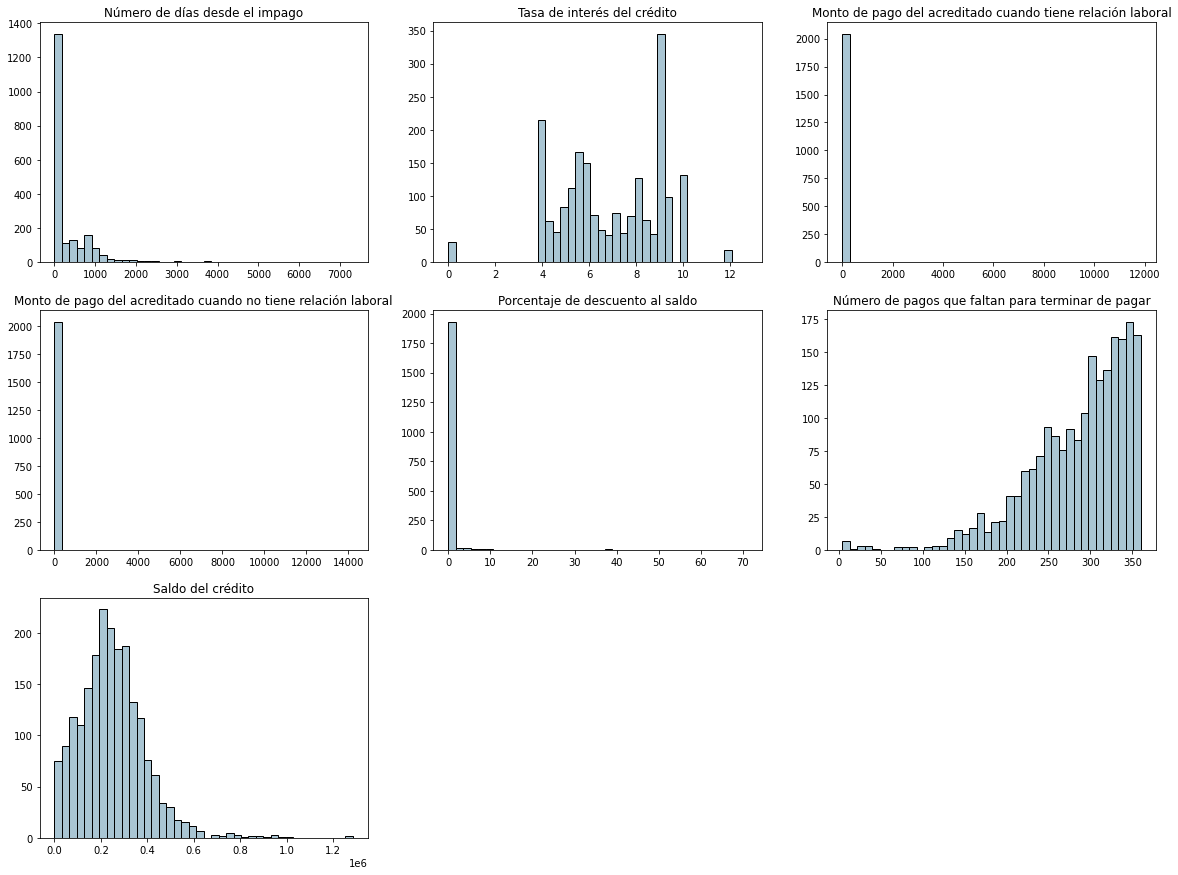

In [19]:
fig = plt.figure(figsize=(20, 15))

# Divide the figure into a 2x1 grid, and give me the first section
ax1 = fig.add_subplot(331)
ax2 = fig.add_subplot(332)
ax3 = fig.add_subplot(333)
ax4 = fig.add_subplot(334)
ax5 = fig.add_subplot(335)
ax6 = fig.add_subplot(336)
ax7 = fig.add_subplot(337)

creditos['NU_DIAS_MOROSIDAD'].hist(bins= 40, color='#A9C5D3', edgecolor='black',ax=ax1, grid=False)
creditos['PC_TASA'].hist(bins= 40, color='#A9C5D3', edgecolor='black',ax=ax2, grid=False)
creditos['CT_FACTOR_ROA'].hist(bins= 40, color='#A9C5D3', edgecolor='black',ax=ax3, grid=False)
creditos['CT_FACTOR_REA'].hist(bins= 40, color='#A9C5D3', edgecolor='black',ax=ax4, grid=False)
creditos['PC_QUITA'].hist(bins= 40, color='#A9C5D3', edgecolor='black',ax=ax5, grid=False)
creditos['PLAZO_REMA'].hist(bins= 40, color='#A9C5D3', edgecolor='black',ax=ax6, grid=False)
creditos['SDO_CRED'].hist(bins= 40, color='#A9C5D3', edgecolor='black',ax=ax7, grid=False)

ax1.set_title('Número de días desde el impago')
ax2.set_title('Tasa de interés del crédito')
ax3.set_title('Monto de pago del acreditado cuando tiene relación laboral')
ax4.set_title('Monto de pago del acreditado cuando no tiene relación laboral')
ax5.set_title('Porcentaje de descuento al saldo')
ax6.set_title('Número de pagos que faltan para terminar de pagar')
ax7.set_title('Saldo del crédito')

In [0]:
continuous_features = ['NU_DIAS_MOROSIDAD','PC_TASA','CT_FACTOR_ROA','CT_FACTOR_REA','PC_QUITA','PLAZO_REMA','SDO_CRED', 'lat', 'long']

In [0]:
scaler = preprocessing.StandardScaler()
scaled_creditos = scaler.fit_transform(creditos[continuous_features])
scaled_df = pd.DataFrame(scaled_creditos, columns=continuous_features)

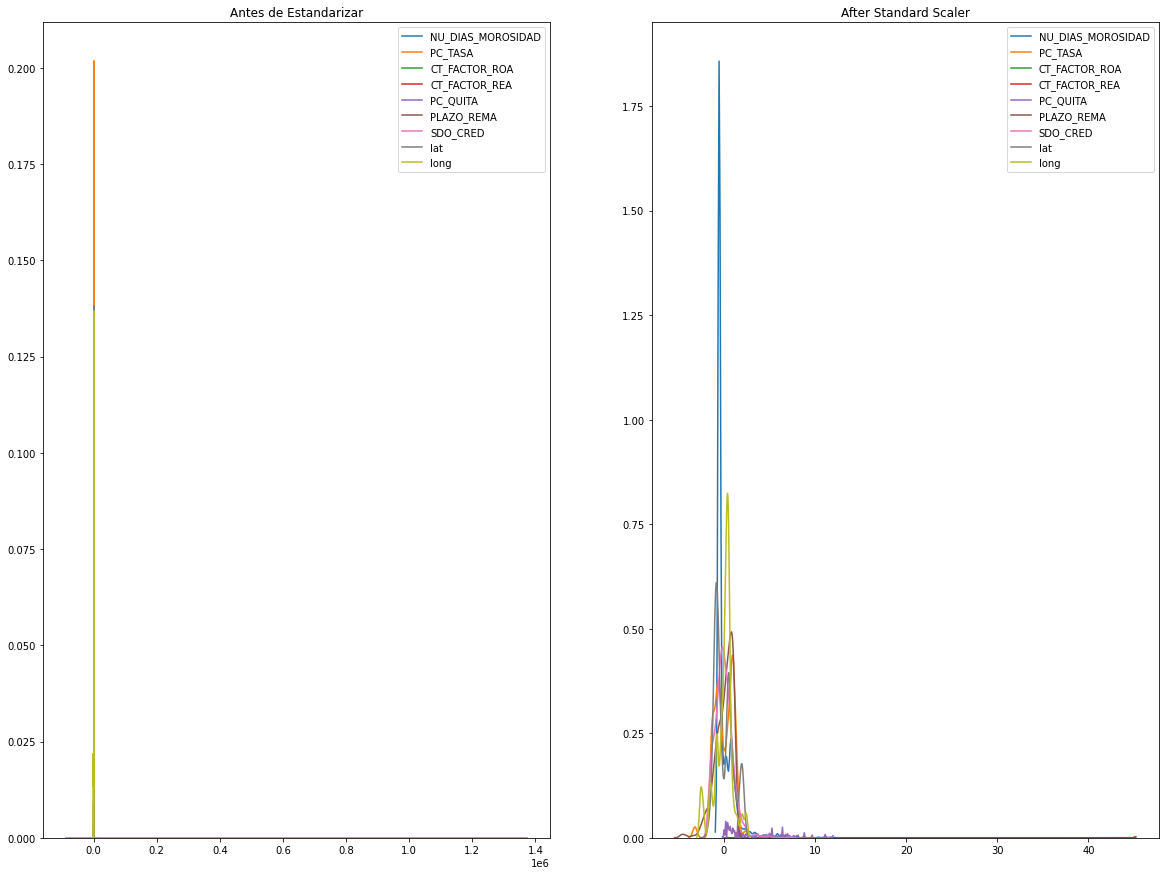

<Figure size 432x288 with 0 Axes>

In [22]:
fig, (ax1, ax2) = plt.subplots(ncols=2, figsize=(20, 15))

ax1.set_title('Antes de Estandarizar')
sns.kdeplot(creditos['NU_DIAS_MOROSIDAD'], ax=ax1)
sns.kdeplot(creditos['PC_TASA'], ax=ax1)
sns.kdeplot(creditos['CT_FACTOR_ROA'], ax=ax1)
sns.kdeplot(creditos['CT_FACTOR_REA'], ax=ax1)
sns.kdeplot(creditos['PC_QUITA'], ax=ax1)
sns.kdeplot(creditos['PLAZO_REMA'], ax=ax1)
sns.kdeplot(creditos['SDO_CRED'], ax=ax1)
sns.kdeplot(creditos['lat'], ax=ax1)
sns.kdeplot(creditos['long'], ax=ax1)
ax2.set_title('After Standard Scaler')
sns.kdeplot(scaled_df['NU_DIAS_MOROSIDAD'], ax=ax2)
sns.kdeplot(scaled_df['PC_TASA'], ax=ax2)
sns.kdeplot(scaled_df['CT_FACTOR_ROA'], ax=ax2)
sns.kdeplot(scaled_df['CT_FACTOR_REA'], ax=ax2)
sns.kdeplot(scaled_df['PC_QUITA'], ax=ax2)
sns.kdeplot(scaled_df['PLAZO_REMA'], ax=ax2)
sns.kdeplot(scaled_df['SDO_CRED'], ax=ax2)
sns.kdeplot(scaled_df['lat'], ax=ax2)
sns.kdeplot(scaled_df['long'], ax=ax2)
plt.show()
plt.savefig('scaling.png', bbox_inches='tight')

###Encoding de los datos

####Hacemos el encoding para las variables categóricas

In [23]:
reg = LabelEncoder()
regimen_labels = reg.fit_transform(creditos['CV_REGIMEN'])
regimen_mappings = {index: label for index, label in 
                  enumerate(reg.classes_)}
creditos['regimen_label'] =regimen_labels
regimen_mappings

{0: 'EXT', 1: 'REA', 2: 'ROA'}

In [24]:
est = LabelEncoder()
estatus_labels = est.fit_transform(creditos['CV_ESTATUS_CONTABLE'])
estatus_mappings = {index: label for index, label in 
                  enumerate(est.classes_)}
creditos['estatus_label'] =estatus_labels                 
estatus_mappings

{0: 'VEN', 1: 'VIG'}

In [25]:
pool = LabelEncoder()
pool_labels = pool.fit_transform(creditos['CV_POOL_GPO'])
pool_mappings = {index: label for index, label in 
                  enumerate(pool.classes_)}
creditos['pool_label'] =pool_labels      
pool_mappings

{0: 'BUR', 1: 'FID', 2: 'INF', 3: 'SEG'}

In [0]:
reg_ohe = OneHotEncoder()
reg_feature_arr = reg_ohe.fit_transform(
                              creditos[['regimen_label']]).toarray()
reg_feature_labels = list(reg.classes_)
reg_features = pd.DataFrame(reg_feature_arr, 
                            columns=reg_feature_labels)


In [0]:
est_ohe = OneHotEncoder()
est_feature_arr = est_ohe.fit_transform(
                                creditos[['estatus_label']]).toarray()
est_feature_labels = list(est.classes_)
est_features = pd.DataFrame(est_feature_arr, 
                            columns=est_feature_labels)


In [0]:
pool_ohe = OneHotEncoder()
pool_feature_arr = pool_ohe.fit_transform(
                                creditos[['pool_label']]).toarray()
pool_feature_labels = list(pool.classes_)
pool_features = pd.DataFrame(pool_feature_arr, 
                            columns=pool_feature_labels)

In [0]:
creditos_limp =creditos.reset_index()
creditos_df_ohe = creditos_limp.join(reg_features)
creditos_df_ohe = creditos_df_ohe.join(est_features)
creditos_df_ohe = creditos_df_ohe.join(pool_features)

In [0]:
columns = categorical_features = ['index','CV_REGIMEN', 'CV_ESTATUS_CONTABLE', 'CV_POOL_GPO', 'regimen_label', 'estatus_label', 'pool_label']
creditos_df_ohe.drop(columns, axis=1, inplace=True)
creditos_df_ohe.set_index('CV_CREDITO', inplace=True)

In [0]:
# creditos_df_ohe.to_csv('datos_procesados.csv',encoding='utf-8-sig')

In [0]:
# creditos_df_ohe =  pd.read_csv('datos_procesados.csv',encoding='utf-8-sig')

####Ahora el encoding para nuestra variable objetivo

'CV_STA_T23' contiene las categorías de la Forma de liquidación del crédito, en particular nos interesa 'CAD' (Credito Liquidado por Adjudicación)



In [31]:
liq = LabelEncoder()
liq_labels = liq.fit_transform(creditos['CV_STA_T23'])
liq_mappings = {index: label for index, label in 
                  enumerate(liq.classes_)}
creditos_df_ohe['liq_label'] =liq_labels
liq_mappings

{0: 'CAD ',
 1: 'CDA',
 2: 'CDE',
 3: 'CIP',
 4: 'CL',
 5: 'CVP',
 6: 'D10',
 7: 'D15',
 8: 'D30',
 9: 'D40',
 10: 'DNA',
 11: 'EPO',
 12: 'L90',
 13: 'LSD',
 14: 'MVB',
 15: 'MVC',
 16: 'MVR'}

La categoría que queremos será 0.

Podemos ver, analizando cuantos elementos de cada categoría están presentes en el dataset, que requeriremos hacer un resampleo de datos para balancear.

In [32]:
creditos_df_ohe['liq_label'].value_counts()

0     944
4     738
14    151
2      57
12     47
16     25
13     25
3      16
11     13
7       7
5       5
8       4
10      3
9       3
15      2
6       2
1       2
Name: liq_label, dtype: int64

(Con base en experimentación) Se encontró que el número de categorías es demasiado alto, por lo que se está eliminando de el set de pruebas las categorías de menor aparición.

In [0]:
cat_despreciable =[1, 6, 15, 9, 10, 8, 5, 7]
creditos_df_ohe = creditos_df_ohe[creditos_df_ohe.liq_label!=1]
creditos_df_ohe = creditos_df_ohe[creditos_df_ohe.liq_label!=6]
creditos_df_ohe = creditos_df_ohe[creditos_df_ohe.liq_label!=15]
creditos_df_ohe = creditos_df_ohe[creditos_df_ohe.liq_label!=9]
creditos_df_ohe = creditos_df_ohe[creditos_df_ohe.liq_label!=10]
creditos_df_ohe = creditos_df_ohe[creditos_df_ohe.liq_label!=8]
creditos_df_ohe = creditos_df_ohe[creditos_df_ohe.liq_label!=5]
creditos_df_ohe = creditos_df_ohe[creditos_df_ohe.liq_label!=7]

In [35]:
creditos_df_ohe['liq_label'].value_counts()

0     944
4     738
14    151
2      57
12     47
16     25
13     25
3      16
11     13
Name: liq_label, dtype: int64

In [0]:
data = ['NU_DIAS_MOROSIDAD', 'CV_ESTATUS_REESTRUCTURA', 'PC_TASA',
       'CT_FACTOR_ROA', 'CT_FACTOR_REA', 'PC_QUITA', 'PLAZO_REMA', 'SDO_CRED',
       'lat', 'long', 'EXT', 'REA', 'ROA', 'VEN', 'VIG', 'BUR',
       'FID', 'INF', 'SEG']
target = ['liq_label']
x_train, x_test, y_train, y_test = train_test_split(creditos_df_ohe[data], creditos_df_ohe[target], test_size=0.30, random_state=0)

In [40]:
x_train.shape

(1411, 19)

In [41]:
y_train.shape

(1411, 1)

In [42]:
from sklearn.utils import resample

X = pd.concat([x_train, y_train], axis=1)

# separamos la clase mayoritaria de las minoritarias
adjudica = X[X.liq_label==0]
clase1 = X[X.liq_label!=0]

print(len(adjudica))

# resampleamos la clase minoritaria
liq_upsampled1 = resample(clase1, replace=True, n_samples=len(adjudica),random_state=27) # reproducible


# combina la mayoritaria con las creadas
# upsampled = pd.concat([adjudica, liq_upsampled1,  liq_upsampled2, liq_upsampled3, liq_upsampled4, liq_upsampled5, liq_upsampled6, liq_upsampled7, liq_upsampled8,
#                        liq_upsampled9, liq_upsampled10, liq_upsampled11, liq_upsampled12, liq_upsampled13, liq_upsampled14, liq_upsampled15, liq_upsampled16])

upsampled = pd.concat([adjudica, liq_upsampled1])

# check new class counts
upsampled.liq_label.value_counts()

666


0     666
4     441
14     91
2      47
12     35
13     19
16     14
3      13
11      6
Name: liq_label, dtype: int64

In [0]:
y_train = upsampled.liq_label
x_train = upsampled.drop('liq_label', axis=1)

In [44]:
print(y_train.shape)
print(x_train.shape)

(1332,)
(1332, 19)


##Creación de modelos

Se seleccionaron Regresión Logística, SVM, Native Bayes y DecisionTree

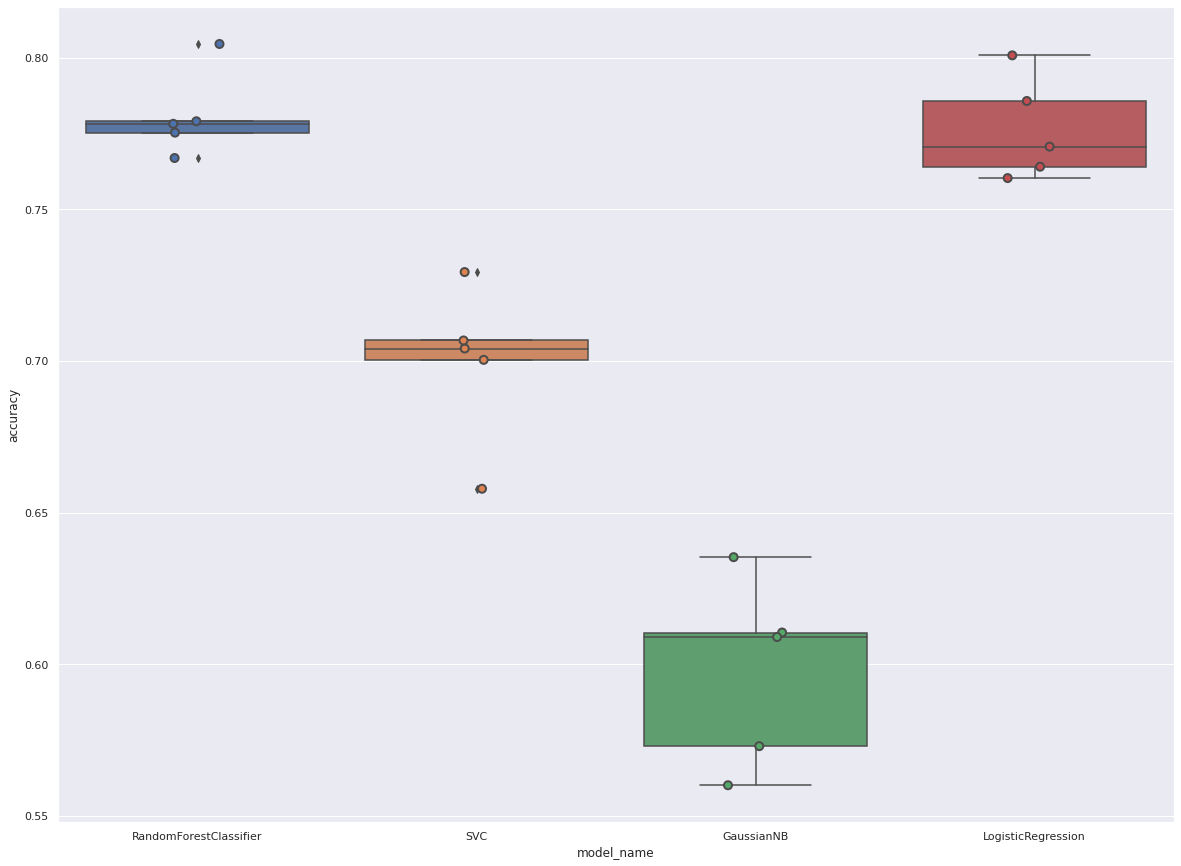

In [67]:
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.svm import SVC 
from sklearn.model_selection import cross_val_score
from sklearn.naive_bayes import GaussianNB

features = x_train
labels = y_train

models = [
    RandomForestClassifier(n_estimators=200, max_depth=3, random_state=0, max_features = 'sqrt'),
    SVC(kernel = 'rbf'),
    GaussianNB(),
    LogisticRegression(random_state=0, max_iter=100000),
]
CV = 5
cv_df = pd.DataFrame(index=range(CV * len(models)))
entries = []
for model in models:
  model_name = model.__class__.__name__
  accuracies = cross_val_score(model, features, labels, scoring='accuracy', cv=CV)
  for fold_idx, accuracy in enumerate(accuracies):
    entries.append((model_name, fold_idx, accuracy))
cv_df = pd.DataFrame(entries, columns=['model_name', 'fold_idx', 'accuracy'])

import seaborn as sns
sns.set(rc={'figure.figsize':(20,15)})
sns.boxplot(x='model_name', y='accuracy', data=cv_df)
sns.stripplot(x='model_name', y='accuracy', data=cv_df, 
              size=8, jitter=True, edgecolor="gray", linewidth=2)

plt.savefig('modelos.png', bbox_inches='tight')
plt.show()

In [68]:
cv_df.groupby('model_name').accuracy.mean()

model_name
GaussianNB                0.597606
LogisticRegression        0.776297
RandomForestClassifier    0.780786
SVC                       0.699696
Name: accuracy, dtype: float64

Vemos que los predictores tienen un accuracy no muy bueno, esto pudede deberse a la alta variabilidad de los datos, así como las etiquetas desbalanceadas.

Exploraremos el mejor predictor (RFC)

In [0]:
modelo = RandomForestClassifier(n_estimators=100, 
                               bootstrap = True,
                               max_features = 'sqrt')
# Fit on training data
modelo.fit(x_train,y_train)
y_pred = modelo.predict(x_test)


In [75]:
creditos_df_ohe.CV_STA_T23.values

array(['CAD ', 'CAD ', 'CAD ', ..., 'CDE', 'CL', 'CL'], dtype=object)

In [76]:
from sklearn.metrics import confusion_matrix
conf_mat = confusion_matrix(y_test, y_pred)
conf_mat

array([[268,   0,   0,   7,   0,   0,   0,   3,   0],
       [  4,   0,   0,   7,   0,   0,   0,   2,   0],
       [  2,   0,   0,   2,   0,   0,   0,   0,   0],
       [  9,   0,   1, 213,   0,   0,   0,   7,   0],
       [  5,   0,   0,   2,   0,   0,   0,   0,   0],
       [  0,   0,   0,  12,   0,   0,   0,   0,   0],
       [  3,   0,   0,   4,   0,   0,   0,   0,   0],
       [ 10,   1,   0,   2,   0,   0,   0,  32,   4],
       [  1,   0,   0,   2,   0,   0,   0,   2,   0]])

#Evaluación de modelos

https://towardsdatascience.com/an-implementation-and-explanation-of-the-random-forest-in-python-77bf308a9b76

In [402]:
from sklearn.metrics import classification_report
from sklearn.metrics import roc_auc_score


print('----------Regresión Logística----------')
print(modelo1.score(x_test, y_test))
print(confusion_matrix(SVC_prediction, y_test))
print('---------------------------------------')
print('----------------SVM--------------------')
# But Confusion Matrix and Classification Report give more details about performance

print(accuracy_score(SVC_prediction, y_test))
print(classification_report(y_test,SVC_prediction))
print(confusion_matrix(SVC_prediction, y_test))
print('---------------------------------------')
print('-------------Native Bayes--------------')

print('---------------------------------------')
print('-------------DecisionTree--------------')
# Calculate roc auc
roc_value = roc_auc_score(y_test, rf_probs)

              precision    recall  f1-score   support

           0       0.66      0.89      0.75       278
           2       0.00      0.00      0.00        13
           3       0.00      0.00      0.00         4
           4       0.76      0.76      0.76       230
          11       0.00      0.00      0.00         7
          12       0.00      0.00      0.00        12
          13       0.00      0.00      0.00         7
          14       0.00      0.00      0.00        49
          16       0.00      0.00      0.00         5

    accuracy                           0.70       605
   macro avg       0.16      0.18      0.17       605
weighted avg       0.59      0.70      0.64       605

[[247   8   3  56   7   1   3  48   4]
 [  0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0]
 [ 31   5   1 174   0  11   4   1   1]
 [  0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0 

/usr/local/lib/python3.6/dist-packages/sklearn/metrics/_classification.py:1272: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


#Codigo no utilizado 

```
(ignorar, usado en pruebas, se queda de referencia)
```



###Regresión Logística

In [0]:
from sklearn.linear_model import LogisticRegression

modelo1 = LogisticRegression(random_state=0, max_iter=100000)
modelo1.fit(x_train, y_train)

LR_prediction = modelo1.predict(x_test)

###SVM

In [0]:
from sklearn.svm import SVC

modelo2 = SVC(kernel = 'rbf')
modelo2.fit(x_train,y_train)

SVC_prediction = modelo2.predict(x_test)

###Native Bayes

In [0]:
from sklearn.naive_bayes import GaussianNB

gnb = GaussianNB() 
gnb.fit(X_train, y_train) 
  
# making predictions on the testing set 
y_pred = gnb.predict(X_test) 

###RandomForest

In [0]:
from sklearn.ensemble import RandomForestClassifier

# Create the model with 100 trees
modelo4 = RandomForestClassifier(n_estimators=100, 
                               bootstrap = True,
                               max_features = 'sqrt')
# Fit on training data
modelo4.fit(x_train,y_train)

# Actual class predictions
rf_prediction = modelo4.predict(x_test)
# Probabilities for each class
rf_probs = modelo4.predict_proba(x_test)[:, 1]

#Referencias


*   https://www.kdnuggets.com/2019/04/normalization-vs-standardization-quantitative-analysis.html
*   https://medium.com/mindorks/what-is-feature-engineering-for-machine-learning-d8ba3158d97a
*   https://stats.stackexchange.com/questions/277310/classifier-for-continuous-data
*   https://towardsdatascience.com/tree-based-methods-regression-trees-4ee5d8db9fe9
*   https://www.reddit.com/r/MachineLearning/comments/3nuh7g/is_it_effective_to_use_one_hot_encoding_of/cvs2fez/
*   https://towardsdatascience.com/encoding-categorical-features-21a2651a065c
*   https://towardsdatascience.com/scale-standardize-or-normalize-with-scikit-learn-6ccc7d176a02
*   http://benalexkeen.com/feature-scaling-with-scikit-learn/
*   https://stats.stackexchange.com/questions/10289/whats-the-difference-between-normalization-and-standardization
*   https://www.researchgate.net/post/How_do_I_use_principal_component_analysis_PCA_for_mixed_data
*   https://towardsdatascience.com/methods-for-dealing-with-imbalanced-data-5b761be45a18
*   https://stackabuse.com/overview-of-classification-methods-in-python-with-scikit-learn/
*   https://towardsdatascience.com/multi-class-text-classification-with-scikit-learn-12f1e60e0a9f








